In [1]:
# A 'magic' command to display plots inline
%matplotlib inline

# Import all python modules. You need to run this cell for the other cells to work.
import requests 
import numpy as np
import pandas as pd
from datetime import datetime
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

----
## Step 1. Download data
----

### 1a. Defining your area of interest

The `g` geometry parameter is used to download data for a point, line or polygon. Geometry can be written in various formats including WKT, GeoJSON, KML. The examples below use WKT (Well Known Text) format.

#### To get data for a grid cell ...

In [2]:
point = 'POINT(-121.6525 37.7325)'

In [3]:
# Cal-Adapt API
api = 'http://api.cal-adapt.org/api'

# Name of boundary layer in API (Locagrid)
resource = 'locagrid'

#Get ID
url = api + '/' + resource + '/?intersects=' +  point

response = requests.get(url)
data = response.json()
data = data['features'][0]
id  = data['id']
id

40054

### 1b. Download observed daily precp

Daily data is stored as a multiband raster, e.g. observed daily timeseries (1950 -2013) has 23376 bands with each band corresponding to one day, starting from 1950-01-01. 
The code in the next cell contains a bunch of functions to:
    - fetch daily data given an ID and params
    - return a new Pandas dataframe that contains all the data

In [4]:
# Cal-Adapt API
api = 'http://api.cal-adapt.org/api'
# Request header
headers = {'ContentType': 'json'}

def process_daily_data(slug):
    # Make request
    url = api + '/series/' + slug + '/events/?ref=/api/locagrid/%s/&imperial=False&stat=mean' % id
    response = requests.get(url)
    #print(response)
    # Get data
    if response.ok:
        data = response.json()
        df = pd.DataFrame(data)
        df.set_index('index', inplace = True)
        df.index = pd.to_datetime(df.index)
    
    else:
        print('Failed to download:')
    return df

### 1c. Download projected daily precp

The projected daily timeseries are form 2006 - 2099/2100. You can easily modify the code to add/subtract models, scenarios, climate variables

In [5]:
def get_projections():
    # Create an empty list to hold dataframes
    df_list = []

    # Make a combined list of GCMs, scenarios, climate variables for looping
    climvar = ['pr']
    period = ['day']
    models = ['CanESM2', 'CNRM-CM5', 'HadGEM2-ES', 'MIROC5', 'ACCESS1-0', 'CCSM4', 'CESM1-BGC', 'CMCC-CMS', 'GFDL-CM3', 'HadGEM2-CC']
    # Cal Adapt support only ten priority models
    #models = ['CanESM2', 'CNRM-CM5', 'HadGEM2-ES', 'MIROC5']
    scenarios = ['historical', 'rcp85']
    zipped = itertools.product(climvar, period, models, scenarios)

    # Loop through zipped
    for item in zipped:
        # Create slug
        slug = '_'.join(item)
        df = process_daily_data(slug)
        df_list.append(df)
            
    # Combine all the dataframes into one and return
    return pd.concat(df_list)

In [6]:
projectedDF = get_projections()
#units: "kg/m2/s
projectedDF

,name,data
index,,
1950-01-01 00:00:00+00:00,pr_day_CanESM2_historical,9.840120e-05
1950-01-02 00:00:00+00:00,pr_day_CanESM2_historical,4.888590e-05
1950-01-03 00:00:00+00:00,pr_day_CanESM2_historical,1.939000e-07
1950-01-04 00:00:00+00:00,pr_day_CanESM2_historical,3.530220e-05
1950-01-05 00:00:00+00:00,pr_day_CanESM2_historical,1.560250e-05
1950-01-06 00:00:00+00:00,pr_day_CanESM2_historical,0.000000e+00
1950-01-07 00:00:00+00:00,pr_day_CanESM2_historical,1.203900e-06
1950-01-08 00:00:00+00:00,pr_day_CanESM2_historical,0.000000e+00
1950-01-09 00:00:00+00:00,pr_day_CanESM2_historical,0.000000e+00


In [7]:
# Keep only required parameters in slug
projectedDF['Climate Data'] = projectedDF['name'].str.split('_', expand=True)[2] 
projectedDF.index.name = 'Date'
projectedDF.drop(columns= 'name', inplace = True)
projectedDF.head()

,data,Climate Data
Date,,
1950-01-01 00:00:00+00:00,9.840120e-05,CanESM2
1950-01-02 00:00:00+00:00,4.888590e-05,CanESM2
1950-01-03 00:00:00+00:00,1.939000e-07,CanESM2
1950-01-04 00:00:00+00:00,3.530220e-05,CanESM2
1950-01-05 00:00:00+00:00,1.560250e-05,CanESM2


In [8]:
projectedDF = projectedDF.pivot_table( values = 'data', index = 'Date', columns = 'Climate Data')

In [25]:
projectedDF.head()

Climate Data,ACCESS1-0,CCSM4,CESM1-BGC,CMCC-CMS,CNRM-CM5,CanESM2,GFDL-CM3,HadGEM2-CC,HadGEM2-ES,MIROC5,avg
Date,,,,,,,,,,,
1950-01-01 00:00:00+00:00,0.000004,1.489000e-06,0.000011,0.000065,7.208800e-06,9.840120e-05,0.000000,0.000000e+00,0.000000,0.0,0.000019
1950-01-02 00:00:00+00:00,0.000034,1.980900e-06,0.000028,0.000068,4.423000e-07,4.888590e-05,0.000000,6.036000e-07,0.000006,0.0,0.000019
1950-01-03 00:00:00+00:00,0.000130,8.179000e-07,0.000011,0.000000,6.899000e-07,1.939000e-07,0.000000,8.798370e-05,0.000005,0.0,0.000024
1950-01-04 00:00:00+00:00,0.000117,4.396900e-06,0.000000,0.000000,1.453200e-06,3.530220e-05,0.000065,9.035380e-05,0.000000,0.0,0.000031
1950-01-05 00:00:00+00:00,0.000060,1.636700e-05,0.000000,0.000000,0.000000e+00,1.560250e-05,0.000001,7.232610e-05,0.000000,0.0,0.000017


In [26]:
# Visulazing first few rows 
# Units = kg/m^2/s
projectedDF = projectedDF.apply(lambda x: x*86400) #change units to precp mm/day
projectedDF.head()

Climate Data,ACCESS1-0,CCSM4,CESM1-BGC,CMCC-CMS,CNRM-CM5,CanESM2,GFDL-CM3,HadGEM2-CC,HadGEM2-ES,MIROC5,avg
Date,,,,,,,,,,,
1950-01-01 00:00:00+00:00,0.368133,0.128650,0.958176,5.595921,0.622840,8.501864,0.000000,0.000000,0.000000,0.0,1.617558
1950-01-02 00:00:00+00:00,2.963926,0.171150,2.458210,5.840882,0.038215,4.223742,0.000000,0.052151,0.514097,0.0,1.626237
1950-01-03 00:00:00+00:00,11.224751,0.070667,0.975257,0.000000,0.059607,0.016753,0.000000,7.601792,0.389465,0.0,2.033829
1950-01-04 00:00:00+00:00,10.150695,0.379892,0.000000,0.000000,0.125556,3.050110,5.586201,7.806568,0.000000,0.0,2.709902
1950-01-05 00:00:00+00:00,5.205479,1.414109,0.000000,0.000000,0.000000,1.348056,0.087523,6.248975,0.000000,0.0,1.430414


In [27]:
projectedDF['avg'] = projectedDF.mean(axis = 1)

In [28]:
wind = projectedDF[['avg']]
wind.head()

Climate Data,avg
Date,
1950-01-01 00:00:00+00:00,1.617558
1950-01-02 00:00:00+00:00,1.626237
1950-01-03 00:00:00+00:00,2.033829
1950-01-04 00:00:00+00:00,2.709902
1950-01-05 00:00:00+00:00,1.430414


In [29]:
wind.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=55152)

In [30]:
type(wind.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [31]:
wind['year'] = wind.index.year
wind['month'] =wind.index.month
wind['period'] = wind.index.strftime('%m-%d')
#wind.index = wind.index.dt.strftime('%H:%M:%S')
#wind['period']=wind.apply(lambda x:'%d/%d' % (x.month,x.day),axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [32]:
wind.head()

Climate Data,avg,year,month,period
Date,,,,
1950-01-01 00:00:00+00:00,1.617558,1950,1,01-01
1950-01-02 00:00:00+00:00,1.626237,1950,1,01-02
1950-01-03 00:00:00+00:00,2.033829,1950,1,01-03
1950-01-04 00:00:00+00:00,2.709902,1950,1,01-04
1950-01-05 00:00:00+00:00,1.430414,1950,1,01-05


In [33]:
test = wind.pivot_table( values = 'avg', index = 'period', columns = 'year').loc['09-30':'12-31']

In [34]:
test.tail()

year,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
period,,,,,,,,,,,,,,,,,,,,,
12-27,3.673478,4.224258,1.340946,3.081919,3.727806,3.956726,1.343954,2.034021,1.319712,3.835687,...,0.988184,2.392547,1.585268,3.360939,0.853305,2.606291,4.885151,2.934611,0.871601,0.413861
12-28,3.581994,2.787059,2.861038,2.444702,4.196324,4.350425,0.923258,2.700565,2.130995,2.793626,...,2.023321,0.506480,0.892471,4.385947,0.972462,3.308134,6.533320,0.944138,2.554273,0.684636
12-29,2.471958,3.024104,3.535209,5.215845,5.048876,0.515716,0.869232,3.218672,1.421804,2.232537,...,1.772623,0.446498,0.742728,3.261589,1.781742,1.091000,7.698473,1.690075,3.958730,2.100185
12-30,2.561028,4.478792,1.704223,2.052314,3.484309,1.542113,2.607392,4.362645,1.855607,2.211253,...,5.790170,2.832869,1.351939,2.394942,2.924688,2.250711,6.589324,2.118918,4.296422,2.339463
12-31,2.000066,6.611804,1.064686,0.772832,1.770810,0.959628,1.149408,1.594467,4.634207,3.200863,...,3.487013,2.224239,2.751856,0.955804,2.088743,2.487437,6.725803,4.410043,1.935510,3.640759


In [35]:
#test.to_excel("C:/Users/lkaur/Work Python Cookbooks/Wind Data Four GCM/output.xlsx", header = True)

### Onset of winter precp

In [36]:
# Summing precp month wise Onset 
threshold = wind.pivot_table( values = 'avg', index = 'month', columns = 'year', aggfunc=np.sum).loc[9:].sum()*0.10

In [37]:
threshold.head()

year
1950    10.798557
1951    14.332581
1952    14.015432
1953    11.806669
1954    12.507974
dtype: float64

In [38]:
cumsum = test.cumsum()

In [41]:
cumsum.head()

year,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
period,,,,,,,,,,,,,,,,,,,,,
09-30,0.026074,0.000000,0.000000,0.020792,0.799994,0.000433,0.036702,0.036660,0.827732,0.003497,...,0.001721,0.454500,0.000000,0.015346,0.000000,0.059489,0.000000,3.046460,0.888932,0.176009
10-01,0.668967,0.012085,0.015900,0.021071,0.801033,0.023980,0.111894,0.053465,1.584488,1.141261,...,0.001721,0.502841,0.024789,0.023249,0.031958,0.168134,1.367466,5.990839,1.131540,0.176009
10-02,0.674991,0.194748,1.068434,0.048585,0.893928,0.025706,0.143981,0.287527,2.036805,2.397918,...,0.001967,0.537192,0.032059,0.023991,1.434654,0.225859,2.934776,7.550989,2.335963,0.176009
10-03,1.334325,0.237525,3.605745,0.211169,0.900304,0.025756,0.215098,0.289650,2.452950,2.737344,...,0.073093,0.567572,0.032059,2.119831,1.440947,1.129680,4.070547,7.585027,3.631338,0.178654
10-04,2.237507,0.296347,4.723264,0.518633,1.284119,0.157921,0.649515,0.289650,2.725536,2.977000,...,1.434212,0.567572,0.040995,2.940986,1.440947,1.373194,4.148774,7.585027,3.878766,0.434358


In [42]:
onset_of_winter_precp = cumsum[cumsum < threshold].count()

In [43]:
onset_of_winter_precp.head()

year
1950    31
1951    26
1952    25
1953    23
1954    29
dtype: int64

Text(0.5, 1.0, 'Timing of onset of winter precp')

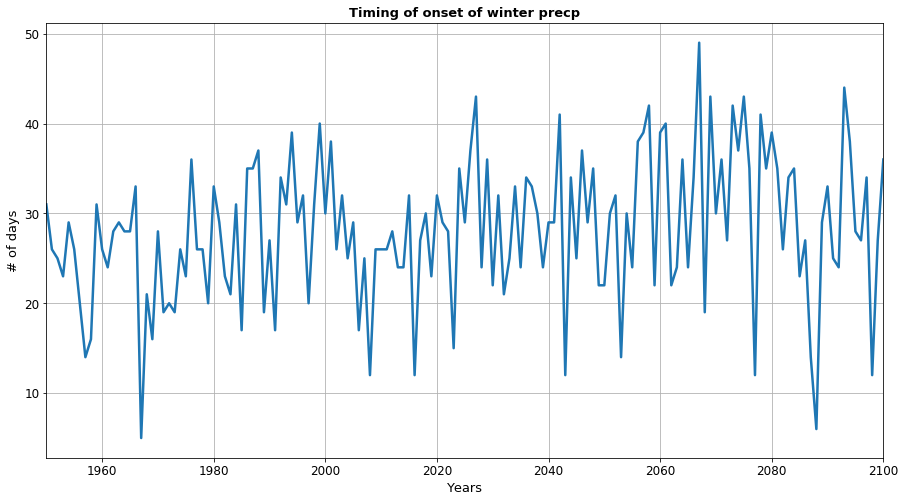

In [58]:
onset_of_winter_precp.plot()
plt.grid(True)
plt.rcParams['figure.figsize'] = [15, 8]
plt.xlabel('Years', fontsize = 13)
plt.ylabel('# of days', fontsize = 13)
plt.title('Timing of onset of winter precp', weight = 'bold', fontsize = 13)

### Wet Day Freq

In [45]:
oct_nov = test.loc['10-01':'11-30']

In [57]:
oct_nov.head()

year,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
period,,,,,,,,,,,,,,,,,,,,,
10-01,0.642893,0.012085,0.015900,0.000279,0.001039,0.023547,0.075192,0.016806,0.756756,1.137764,...,0.000000,0.048341,0.024789,0.007902,0.031958,0.108645,1.367466,2.944380,0.242608,0.000000
10-02,0.006025,0.182663,1.052534,0.027514,0.092896,0.001725,0.032087,0.234062,0.452317,1.256657,...,0.000246,0.034351,0.007270,0.000742,1.402695,0.057725,1.567310,1.560150,1.204423,0.000000
10-03,0.659334,0.042777,2.537311,0.162583,0.006376,0.000050,0.071117,0.002123,0.416145,0.339426,...,0.071125,0.030380,0.000000,2.095840,0.006293,0.903821,1.135771,0.034038,1.295375,0.002645
10-04,0.903182,0.058822,1.117519,0.307465,0.383815,0.132165,0.434417,0.000000,0.272586,0.239656,...,1.361120,0.000000,0.008936,0.821155,0.000000,0.243514,0.078227,0.000000,0.247428,0.255704
10-05,0.487584,0.445539,0.001854,0.500895,0.077714,0.284846,0.584734,0.452634,0.000000,0.109127,...,3.203191,0.011142,0.002366,0.045088,0.052626,0.000000,0.062386,0.000000,0.101387,0.024340


In [47]:
wet_day_freq = oct_nov[oct_nov >= 2.54/86400].count()

In [48]:
wet_day_freq.head()

year
1950    56
1951    58
1952    59
1953    60
1954    58
dtype: int64

Text(0.5, 1.0, 'Wet Day Frequency')

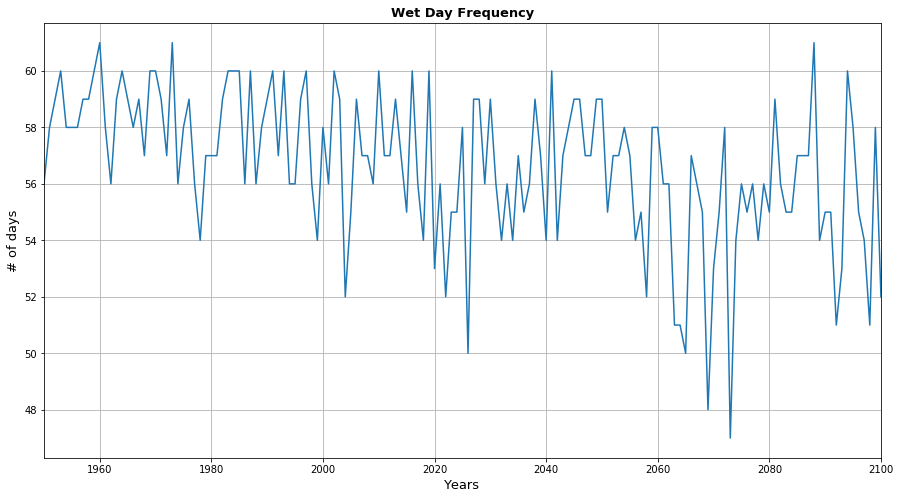

In [49]:
wet_day_freq.plot()
plt.grid(True)
plt.rcParams['figure.figsize'] = [15, 8]
plt.xlabel('Years', fontsize = 13)
plt.ylabel('# of days', fontsize = 13)
plt.title('Wet Day Frequency', weight = 'bold', fontsize = 13)

In [50]:
# Trimming the data to only Timeframe that we need
historical = wind.loc['1978-12-24':'2005-12-31']
beg_century = wind.loc['2006-01-01':'2034-12-31']
mid_century = wind.loc['2035-01-01':'2064-12-31']
end_century = wind.loc['2065-12-24':'2099-12-31']

In [51]:
historical = historical.pivot_table( values = 'avg', index = 'month', columns = 'year')
beg_century = beg_century.pivot_table( values = 'avg', index = 'month', columns = 'year')
mid_century = mid_century.pivot_table( values = 'avg', index = 'month', columns = 'year')
end_century = end_century.pivot_table( values = 'avg', index = 'month', columns = 'year')

In [52]:
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [15, 6]

In [53]:
historical['avg'] = historical.mean(axis = 1)
historical['max'] = historical.max(axis = 1)
historical['min'] = historical.min(axis = 1)

beg_century['avg'] = beg_century.mean(axis = 1)
beg_century['min'] = beg_century.max(axis = 1)
beg_century['max'] = beg_century.min(axis = 1)

mid_century['avg'] = mid_century.mean(axis = 1)
mid_century['min'] = mid_century.max(axis = 1)
mid_century['max'] = mid_century.min(axis = 1)

end_century['avg'] = end_century.mean(axis = 1)
end_century['min'] = end_century.min(axis = 1)
end_century['max'] = end_century.max(axis = 1)

In [54]:
new_order = [7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6]

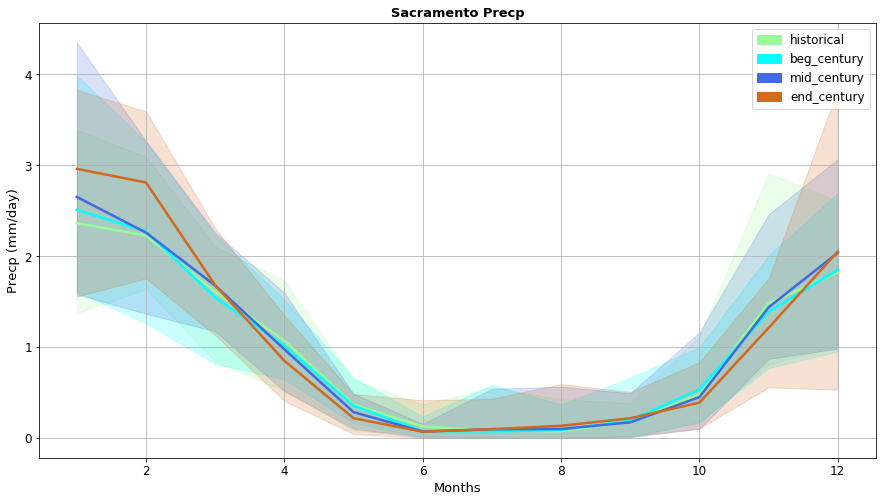

In [56]:
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
ax = pl.plot(historical.index, historical.avg, 'k-', color = 'palegreen')
pl.fill_between(historical.index, historical['min'], historical['max'], color = 'palegreen', alpha = 0.2)

pl.plot(beg_century.index, beg_century.avg, color = 'cyan')
pl.fill_between(beg_century.index, beg_century['min'], beg_century['max'], color = 'cyan', alpha = 0.2)

pl.plot(mid_century.index, mid_century.avg, color = 'royalblue')
pl.fill_between(mid_century.index, mid_century['min'], mid_century['max'], color = 'royalblue', alpha = 0.2)

pl.plot(end_century.index, end_century.avg, color = 'chocolate')
pl.fill_between(end_century.index, end_century['min'], end_century['max'], color = 'chocolate', alpha = 0.2)

plt.grid(True)
plt.rcParams['figure.figsize'] = [15, 8]

plt.xlabel('Months', fontsize = 13)
plt.ylabel('Precp (mm/day)', fontsize = 13)
plt.title('Sacramento Precp', weight = 'bold', fontsize = 13)


historical_patch = mpatches.Patch(color='palegreen', label='historical')
beg_century_patch = mpatches.Patch(color='cyan', label='beg_century')
mid_century_patch = mpatches.Patch(color='royalblue', label='mid_century')
end_century_patch = mpatches.Patch(color='chocolate', label='end_century')

plt.legend(handles=[historical_patch, beg_century_patch, mid_century_patch, end_century_patch])